<a href="https://colab.research.google.com/github/PratikshitSingh/Algotrading/blob/master/Duo_moving_average_crossover_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description : This program uses duo moving crossover to determine when to buy and sell stocks.

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
from google.colab import files
upload = files.upload( )

Saving AAPL.csv to AAPL.csv


In [7]:
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


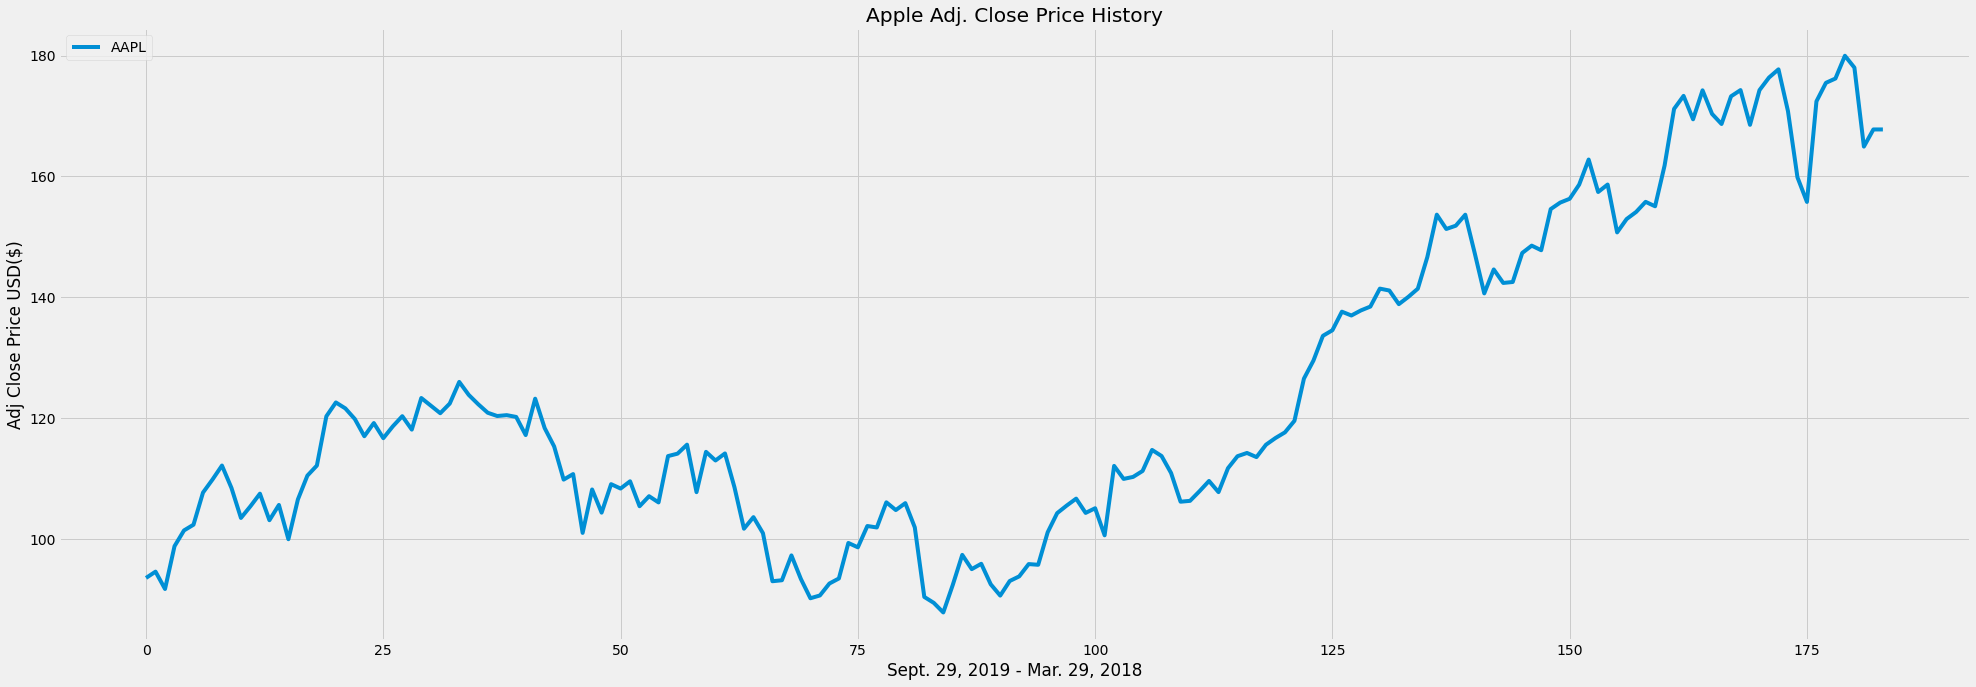

In [19]:
plt.figure(figsize=(30.5, 10.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Sept. 29, 2019 - Mar. 29, 2018')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [32]:
#simple moving average
SMA5 = pd.DataFrame()
SMA5['Adj Close'] = AAPL['Adj Close'].rolling(window=5).mean()
SMA5

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,95.981209
...,...
179,171.978977
180,176.428000
181,174.930002
182,173.386002


In [33]:
SMA10 = pd.DataFrame()
SMA10['Adj Close'] = AAPL['Adj Close'].rolling(window=10).mean()
SMA10

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,171.895239
180,172.268300
181,171.125209
182,170.129674


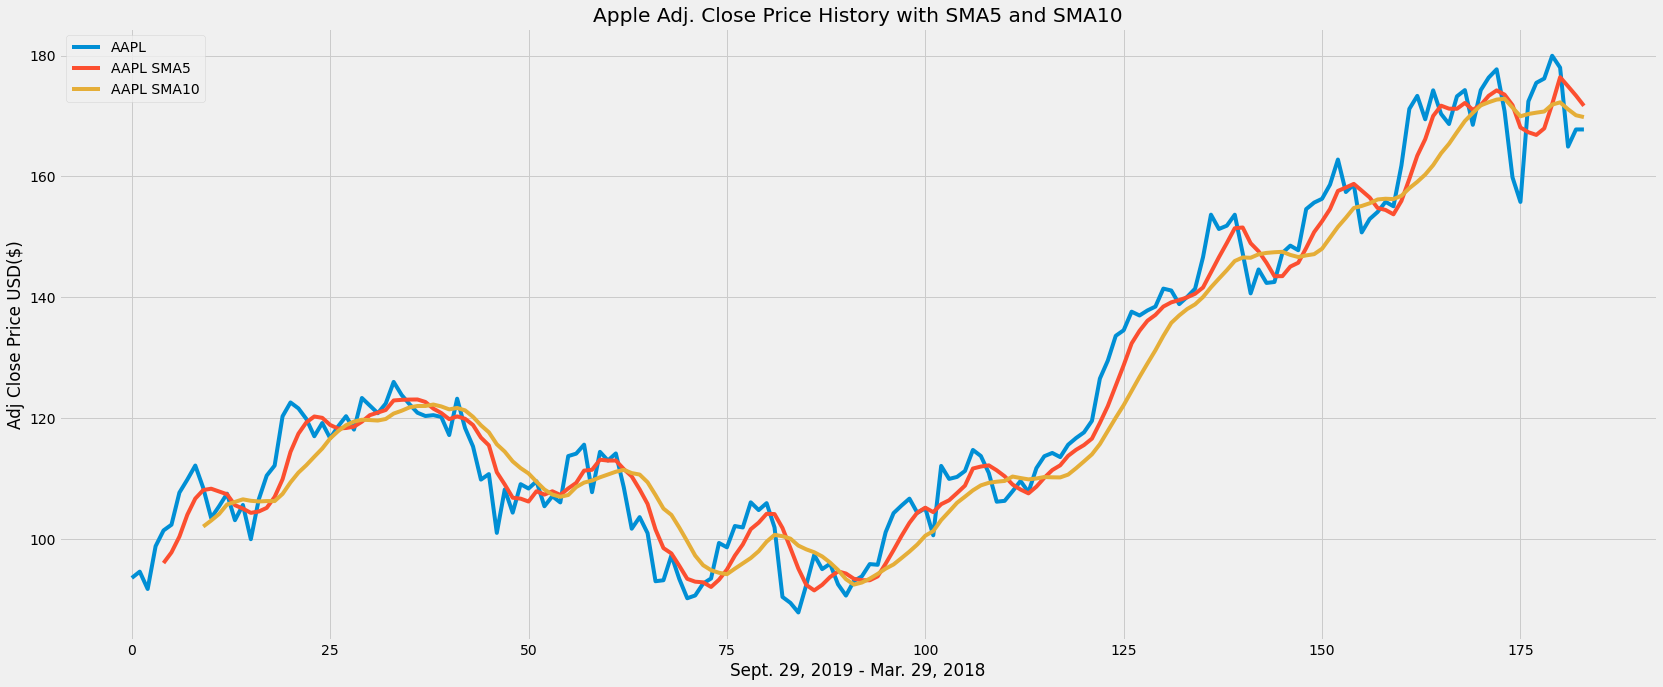

In [34]:
plt.figure(figsize=(25.5, 10.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA5['Adj Close'], label = 'AAPL SMA5')
plt.plot(SMA10['Adj Close'], label = 'AAPL SMA10')
plt.title('Apple Adj. Close Price History with SMA5 and SMA10')
plt.xlabel('Sept. 29, 2019 - Mar. 29, 2018')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [36]:
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA5'] = SMA5['Adj Close']
data['SMA10'] = SMA10['Adj Close']
data

,AAPL,SMA5,SMA10
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,95.981209,NaN
...,...,...,...
179,179.979996,171.978977,171.895239
180,178.020004,176.428000,172.268300
181,164.940002,174.930002,171.125209
182,167.779999,173.386002,170.129674


In [45]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
      if data['SMA5'][i] > data['SMA10'][i]:
        if flag != 1:
          sigPriceBuy.append(data['AAPL'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif data['SMA5'][i] < data['SMA10'][i]:
        if flag != 0:
          sigPriceSell.append(data['AAPL'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)

In [46]:
buy_sell = buy_sell(data)
data['buy_signal_price'] = buy_sell[0]
data['sell_signal_price'] = buy_sell[1]

In [47]:
data

,AAPL,SMA5,SMA10,buy_signal_price,sell_signal_price
0,93.514290,NaN,NaN,NaN,NaN
1,94.556244,NaN,NaN,NaN,NaN
2,91.683792,NaN,NaN,NaN,NaN
3,98.771042,NaN,NaN,NaN,NaN
4,101.380676,95.981209,NaN,NaN,NaN
...,...,...,...,...,...
179,179.979996,171.978977,171.895239,179.979996,NaN
180,178.020004,176.428000,172.268300,NaN,NaN
181,164.940002,174.930002,171.125209,NaN,NaN
182,167.779999,173.386002,170.129674,NaN,NaN


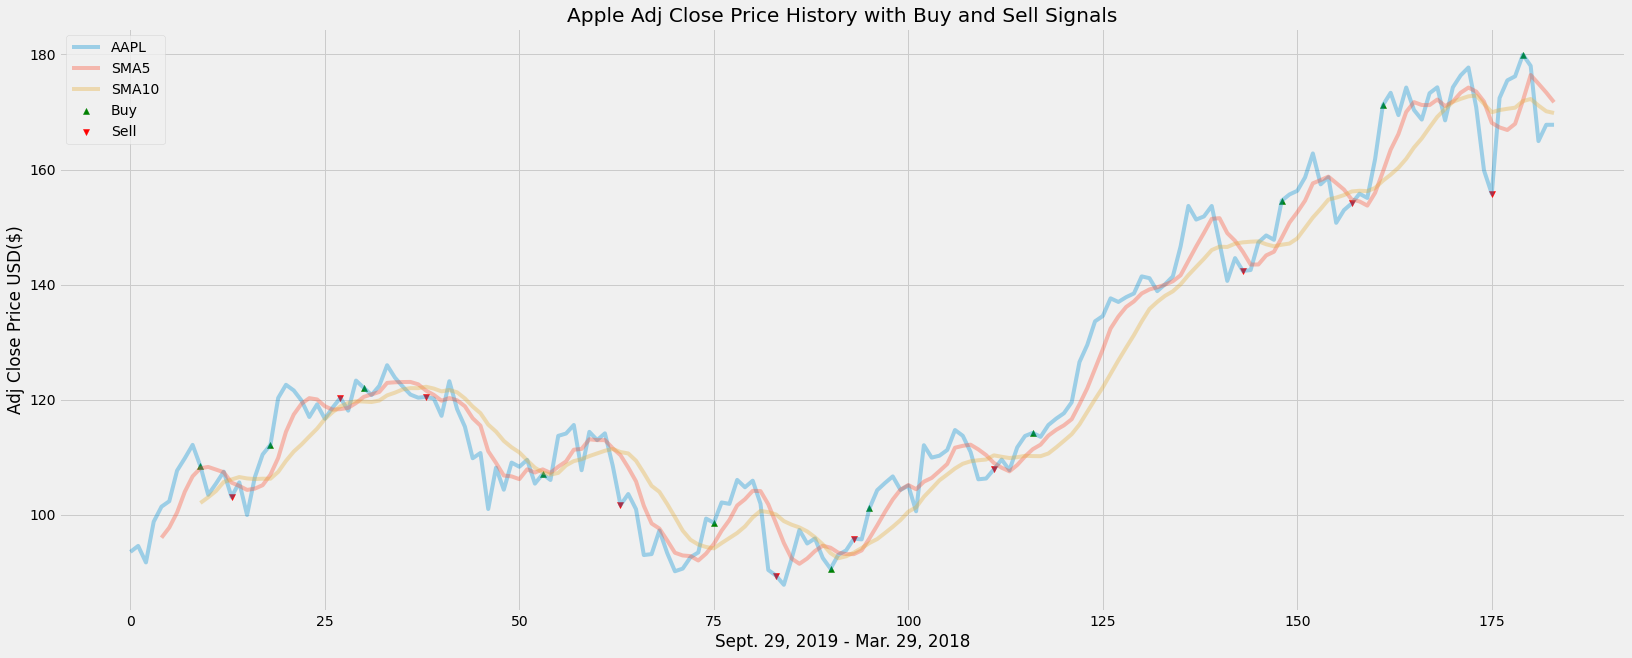

In [51]:
plt.figure(figsize=(25,10))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA5'], label = 'SMA5', alpha = 0.35)
plt.plot(data['SMA10'], label = 'SMA10', alpha = 0.35)
plt.scatter(data.index, data['buy_signal_price'], label = "Buy", marker = '^', color = 'green')
plt.scatter(data.index, data['sell_signal_price'], label = "Sell", marker = 'v', color = 'red')
plt.title('Apple Adj Close Price History with Buy and Sell Signals')
plt.xlabel('Sept. 29, 2019 - Mar. 29, 2018')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()